# Playground Zollman-effect



In [77]:
import numpy as np
import networkx as nx
from agent import Agent
from model import Model
from hybrid_networks import create_hybrid_network
%load_ext autoreload
%autoreload 2                      

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
import opinionated
import matplotlib.pyplot as plt
plt.style.use("opinionated_rc")
import colormaps as cmaps 

Testing out our simulation-function:


In [78]:
n_agents = 100
my_network = create_hybrid_network(20,degree=5,p_preferential_attachment=.01)#nx.erdos_renyi_graph(n_agents, 0.009)

my_model = Model(my_network, n_experiments=1000, uncertainty=0.01,agent_type = "bayes")


my_model.simulation(number_of_steps=1000,show_bar=True)


  0%|          | 0/1000 [00:00<?, ?it/s]

array([0.99997232, 0.9999933 , 0.99999659, 0.99999065, 0.99994958,
       0.99972725, 0.99993531, 0.99992176, 0.99997199, 0.99999678,
       0.99623567, 0.99999208, 0.99999947, 0.99997761, 0.99952441,
       0.99952456, 0.99999842, 0.99895625, 0.99858838, 0.99999988])

# Setting up parameters
(Here we replicate the wheel, cycle, complete setup)

In [86]:
import random
import networkx as nx

def create_graph(keyword, n_agents):
    if keyword == "complete":
        return nx.complete_graph(n_agents)
    elif keyword == "wheel":
        return nx.wheel_graph(n_agents)
    elif keyword == "cycle":
        return nx.cycle_graph(n_agents)
    else:
        raise ValueError("Invalid keyword. Please choose 'complete', 'wheel', or 'cycle'.")

def generate_parameters(n):
    params_list = []
    for _ in range(n):
        n_agents = random.randint(3, 11)
        network_keyword = random.choice(["complete", "wheel", "cycle"])
        network = create_graph(network_keyword, n_agents)
        uncertainty = 0.001
        n_experiments = 1000 #random.randint(1, 1000)
        params = {
            "n_agents": n_agents,
            "network_type" : network_keyword,
            "network": network,
            "uncertainty": uncertainty,
            "n_experiments": n_experiments
        }
        params_list.append(params)
    return params_list

# Example usage:
# Generate a list of 5 parameter dictionaries
parameter_dictionaries = generate_parameters(50)


In [87]:
parameter_dictionaries

[{'n_agents': 10,
  'network_type': 'cycle',
  'network': <networkx.classes.graph.Graph at 0x2c80b9010>,
  'uncertainty': 0.001,
  'n_experiments': 1000},
 {'n_agents': 10,
  'network_type': 'complete',
  'network': <networkx.classes.graph.Graph at 0x2f4165290>,
  'uncertainty': 0.001,
  'n_experiments': 1000},
 {'n_agents': 5,
  'network_type': 'wheel',
  'network': <networkx.classes.graph.Graph at 0x2f41a28d0>,
  'uncertainty': 0.001,
  'n_experiments': 1000},
 {'n_agents': 9,
  'network_type': 'complete',
  'network': <networkx.classes.graph.Graph at 0x2f41a2bd0>,
  'uncertainty': 0.001,
  'n_experiments': 1000},
 {'n_agents': 3,
  'network_type': 'cycle',
  'network': <networkx.classes.graph.Graph at 0x2f41a3890>,
  'uncertainty': 0.001,
  'n_experiments': 1000},
 {'n_agents': 4,
  'network_type': 'complete',
  'network': <networkx.classes.graph.Graph at 0x2f41a2950>,
  'uncertainty': 0.001,
  'n_experiments': 1000},
 {'n_agents': 3,
  'network_type': 'complete',
  'network': <netw

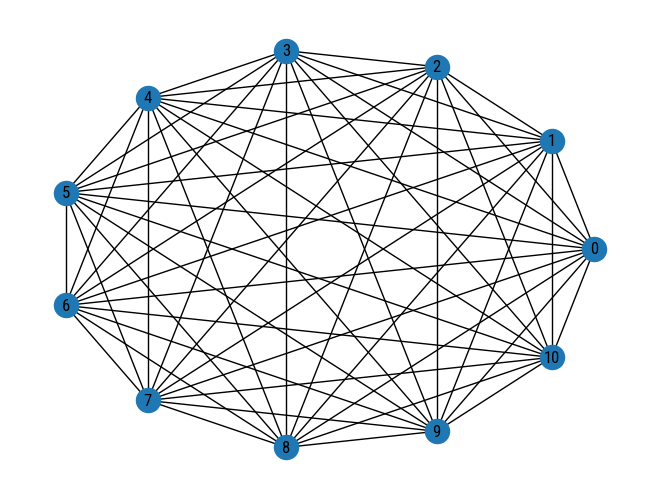

In [98]:
import networkx as nx
import matplotlib.pyplot as plt

# Replace 'parameter_dictionaries[0]['network']' with the actual graph variable
graph = parameter_dictionaries[10]['network']

# Plot the graph
nx.draw(graph, with_labels=True,pos=nx.circular_layout(graph))
plt.show()
parameter_dictionaries[0]['network']

In [83]:
import numpy as np

def run_simulation_with_params(param_dict, number_of_steps=1000, show_bar=False):
    # Extract the network directly since it's already a NetworkX graph object
    my_network = param_dict['network']
    # Other parameters are directly extracted from the dictionary
    my_model = Model(my_network, n_experiments=param_dict['n_experiments'], uncertainty=param_dict['uncertainty'], agent_type="bayes")
    # Run the simulation with predefined steps and show_bar option
    credences_post = my_model.simulation(number_of_steps=number_of_steps, show_bar=show_bar)
    true_consensus = np.all(credences_post >= 0.99)
    
    # Compile the results and parameters (excluding the network graph) into a dictionary
    result_dict = {
        "n_agents": param_dict['n_agents'],  # Assuming you want to include this for reference
        "n_experiments": param_dict['n_experiments'],
        "uncertainty": param_dict['uncertainty'],
        "true_consensus": true_consensus,
        "network_type": param_dict['network_type']
    }
    
    return result_dict


parameter_dictionaries = generate_parameters(1)  # Generate one for demonstration
result = run_simulation_with_params(parameter_dictionaries[0], number_of_steps=10000, show_bar=False)
print(result)


{'n_agents': 7, 'n_experiments': 1000, 'uncertainty': 0.001, 'true_consensus': True, 'network_type': 'cycle'}


In [149]:

def run():
  result = run_simulation_with_params( {'n_agents': 10,
    'network_type': 'cycle',
    'network': nx.wheel_graph(11),
    'uncertainty': 0.001,
    'n_experiments': 1000}
                                      
                                      
                                      , number_of_steps=1000000, show_bar=False)
  return result

np.mean([int(run()['true_consensus']) for i in tqdm(range(1000))])

100%|██████████| 1000/1000 [00:09<00:00, 100.84it/s]


0.718

In [84]:


import pandas as pd
from tqdm import tqdm

# Ensure your run_simulation_with_params function and others are defined

def batch_run_simulations(param_list, number_of_steps=1000, show_bar=False):
    def run_simulation(param_dict):
        return run_simulation_with_params(param_dict, number_of_steps=number_of_steps, show_bar=show_bar)
    
    results = []
    # Iterate over each parameter dictionary in the list
    for params in tqdm(param_list, desc="Running simulations"):
        result = run_simulation(params)
        results.append(result)
    
    # Convert the list of results into a Pandas DataFrame
    results_df = pd.DataFrame(results)
    return results_df

# Example usage
parameter_dictionaries = generate_parameters(100000)  # Generate parameter dictionaries
results_df = batch_run_simulations(parameter_dictionaries, number_of_steps=10000, show_bar=False)
print(results_df)


Running simulations: 100%|██████████| 10000/10000 [00:46<00:00, 215.00it/s]

      n_agents  n_experiments  uncertainty  true_consensus network_type
0            8           1000        0.001            True        wheel
1            5           1000        0.001           False     complete
2           10           1000        0.001           False        cycle
3           10           1000        0.001           False     complete
4            9           1000        0.001            True        cycle
...        ...            ...          ...             ...          ...
9995         8           1000        0.001            True     complete
9996         4           1000        0.001           False     complete
9997         6           1000        0.001            True        wheel
9998         3           1000        0.001           False        wheel
9999        11           1000        0.001            True        wheel

[10000 rows x 5 columns]


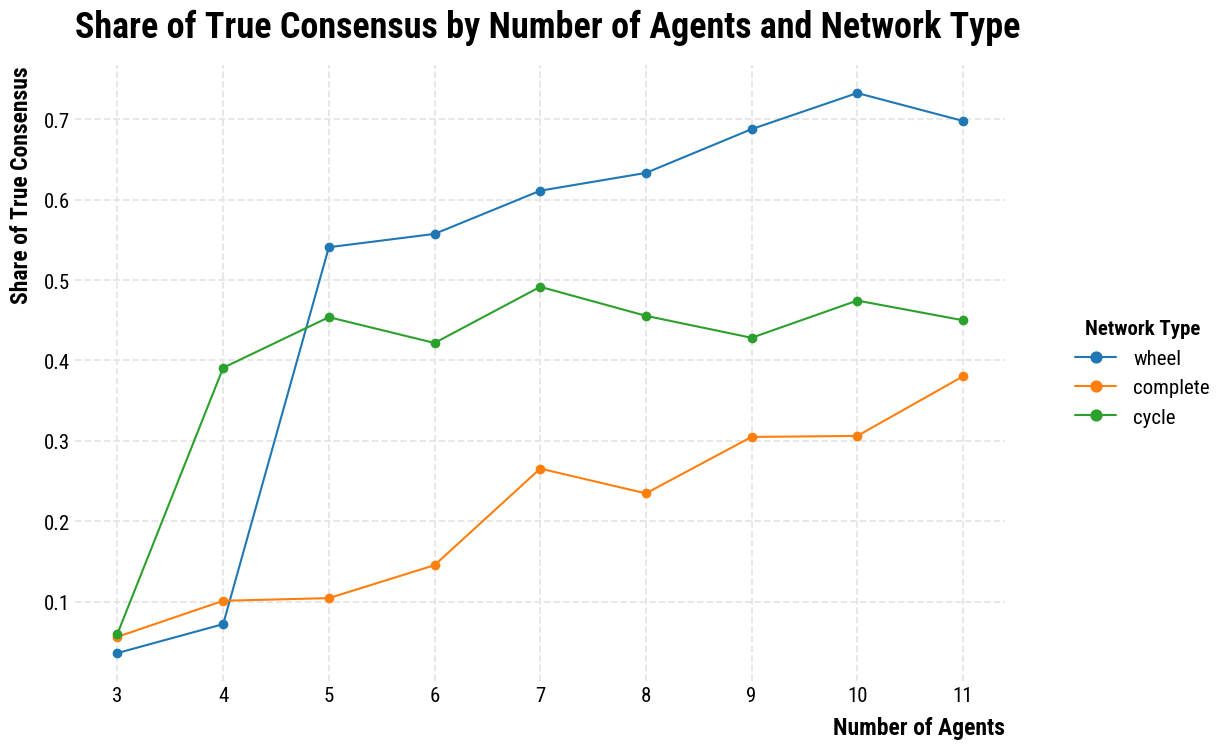

In [85]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame with the data
results_df['true_consensus'] = results_df['true_consensus'].astype(int)  # Convert True/False to 1/0

# Define bins for 'n_agents'
# bins = np.linspace(results_df['n_agents'].min(), results_df['n_agents'].max(), 9)  # Adjust number of bins as needed
# results_df['binned'] = pd.cut(results_df['n_agents'], bins, include_lowest=True)
# print(results_df['binned'])
# Calculate the share of true consensus within each bin, for each network type
grouped = results_df.groupby(['network_type', 'n_agents'])['true_consensus'].mean().reset_index()

# Preparing for the line plot
#grouped['mid_bin'] = grouped['binned'].apply(lambda x: x.mid).astype(float)  # Getting the midpoint of bins for plotting

# Plotting
plt.figure(figsize=(12, 8))

for network_type in results_df['network_type'].unique():
    subset = grouped[grouped['network_type'] == network_type]
    plt.plot(subset['n_agents'], subset['true_consensus'], marker='o', label=network_type)

plt.xlabel('Number of Agents')
plt.ylabel('Share of True Consensus')
plt.title('Share of True Consensus by Number of Agents and Network Type')
opinionated.add_legend(title='Network Type')

plt.grid(True)
plt.show()


In [53]:
import pandas as pd
from pygam import LogisticGAM, s
from sklearn.model_selection import train_test_split

# Splitting the DataFrame by network type
network_types = results_df['network_type'].unique()

models = {}

for network_type in network_types:
    # Subset the DataFrame by network type
    subset = results_df[results_df['network_type'] == network_type]
    
    # Preparing the data
    X = subset[['n_agents']]
    y = subset['true_consensus'].astype(int)  # Convert boolean to integer
    
    # Splitting the data into training and testing sets for model validation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Fitting the Logistic GAM model
    gam = LogisticGAM(s(0,n_splines=6)).fit(X_train, y_train)
    
    # Storing the model
    models[network_type] = gam
    
    # Optionally, you can print out model accuracy or other statistics here
    print(f"Model for {network_type}:")
    print(f"Accuracy on training data: {gam.accuracy(X_train, y_train)}")
    print(f"Accuracy on test data: {gam.accuracy(X_test, y_test)}")
    print("-" * 30)


Model for cycle:
Accuracy on training data: 0.6316023080337329
Accuracy on test data: 0.6024844720496895
------------------------------
Model for wheel:
Accuracy on training data: 0.6871062578748425
Accuracy on test data: 0.6944172380019589
------------------------------
Model for complete:
Accuracy on training data: 0.786046511627907
Accuracy on test data: 0.7948717948717948
------------------------------


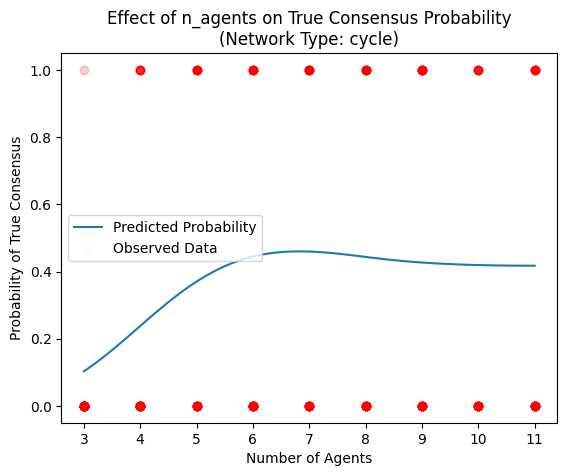

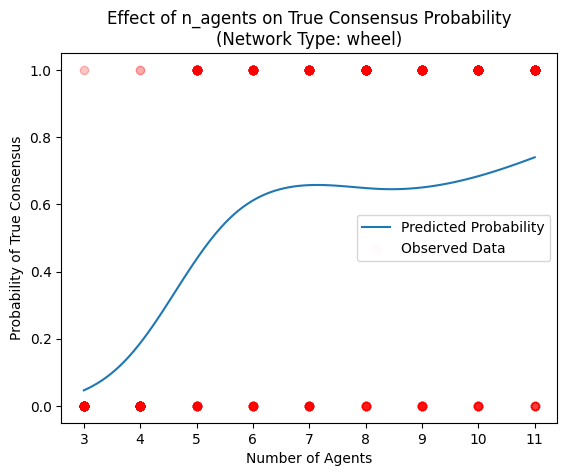

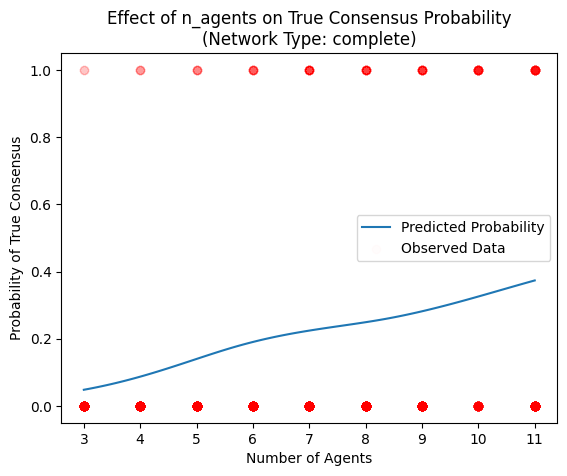

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Continue from the previous models fitting
for network_type, model in models.items():
    # Generating a range of values for n_agents to predict and plot
    X_range = np.linspace(X['n_agents'].min(), X['n_agents'].max(), 100)
    
    # Predicting with the model
    y_pred = model.predict_proba(X_range.reshape(-1, 1))
    
    # Plotting
    plt.figure()
    plt.plot(X_range, y_pred, label='Predicted Probability')
    plt.scatter(results_df[results_df['network_type'] == network_type]['n_agents'], 
                results_df[results_df['network_type'] == network_type]['true_consensus'], 
                c='red', label='Observed Data',alpha=.01)
    plt.title(f'Effect of n_agents on True Consensus Probability\n(Network Type: {network_type})')
    plt.xlabel('Number of Agents')
    plt.ylabel('Probability of True Consensus')
    plt.legend()
    plt.show()
